# Setup, Data Loading, Visualization

Note: you may need to restart the kernel to use updated packages.


2025-04-12 22:37:44.982402: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 22:37:45.019779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744511865.030626    9943 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744511865.034791    9943 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-12 22:37:45.071985: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

🔋 GPU detected — accelerated training enabled.
Device in use: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Train Data Path: /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Final_Project/Brain-Tumor-Detection-Using-Deep-Learning-MRI-Images-Detection-Using-Computer-Vision/dataset/Training
Test Data Path: /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Final_Project/Brain-Tumor-Detection-Using-Deep-Learning-MRI-Images-Detection-Using-Computer-Vision/dataset/Testing


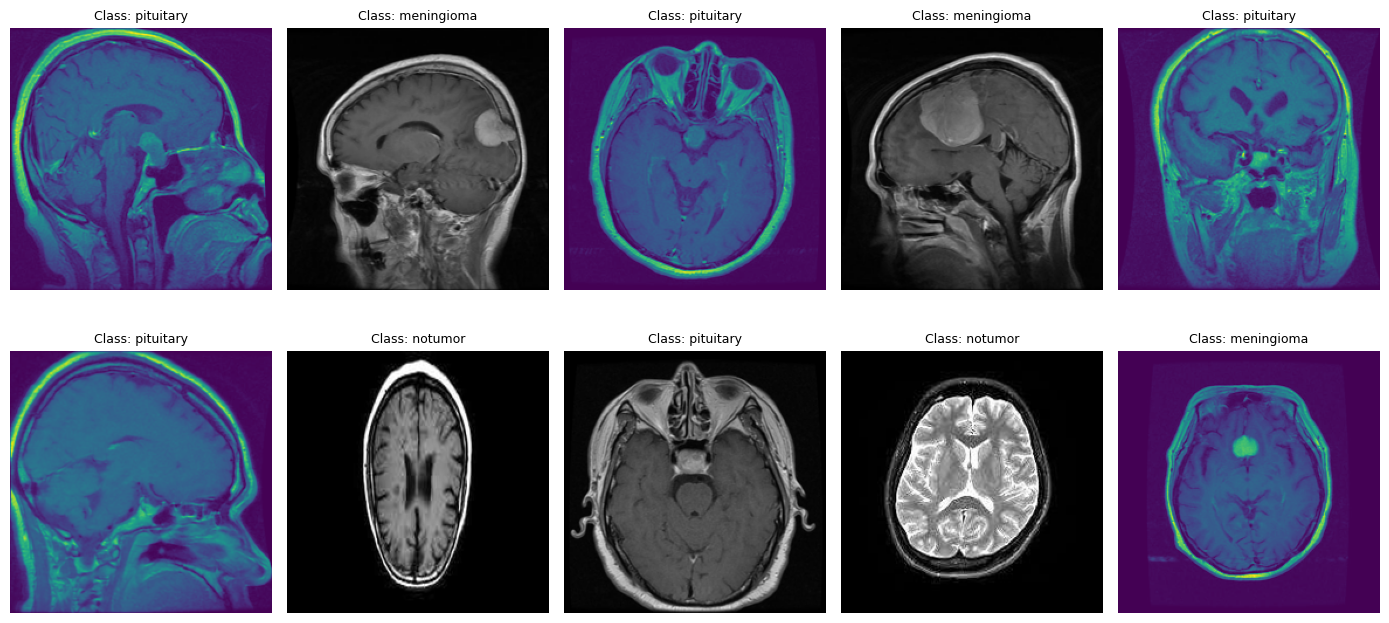

In [1]:
# Step 1: Install necessary libraries from a predefined requirements list
%pip install -r requirements2.txt

# Step 2: Bring in essential modules and verify GPU access
import os
import numpy as np
import random
import tensorflow as tf
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Check if GPU is available and show basic info
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("🔋 GPU detected — accelerated training enabled.")
    for device in gpu_devices:
        print("Device in use:", device)
else:
    print("⚙️ Training will proceed on CPU — no GPU found.")

# Step 3: Configure dataset paths relative to project location
project_root = os.getcwd()
train_path = os.path.join(project_root, "dataset", "Training")
test_path = os.path.join(project_root, "dataset", "Testing")

print("Train Data Path:", train_path)
print("Test Data Path:", test_path)

# Step 4: Fetch image paths and labels from folder hierarchy
def collect_dataset_info(data_dir):
    image_paths, image_labels = [], []
    for category in os.listdir(data_dir):
        category_dir = os.path.join(data_dir, category)
        for img_name in os.listdir(category_dir):
            image_paths.append(os.path.join(category_dir, img_name))
            image_labels.append(category)
    return shuffle(image_paths, image_labels)

train_images, train_classes = collect_dataset_info(train_path)
test_images, test_classes = collect_dataset_info(test_path)

# Step 5: Preview a few training images with labels
def preview_samples(images, labels, count=10):
    selected = random.sample(range(len(images)), count)
    fig, axarr = plt.subplots(2, 5, figsize=(14, 7))
    axarr = axarr.flatten()

    for i, idx in enumerate(selected):
        img = Image.open(images[idx]).resize((224, 224))
        axarr[i].imshow(img)
        axarr[i].axis('off')
        axarr[i].set_title(f"Class: {labels[idx]}", fontsize=9)

    plt.tight_layout()
    plt.show()

# Display random examples from training set
preview_samples(train_images, train_classes)


# Preprocessing, Data Generator, Model, and Training

I0000 00:00:1744511875.651896    9943 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14284 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/5


I0000 00:00:1744511877.304874   10178 service.cc:148] XLA service 0x7c5e24010d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744511877.304899   10178 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090 Laptop GPU, Compute Capability 8.9
2025-04-12 22:37:57.342865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744511877.511100   10178 cuda_dnn.cc:529] Loaded cuDNN version 90800
E0000 00:00:1744511877.788856   10178 buffer_comparator.cc:157] Difference at 64: 0.0488308, expected 2.89195
E0000 00:00:1744511877.788879   10178 buffer_comparator.cc:157] Difference at 65: 0.0357844, expected 2.31978
E0000 00:00:1744511877.788881   10178 buffer_comparator.cc:157] Difference at 66: 0.0191214, expected 3.11867
E0000 00:00:1744511877.788883   10178 buffer_comparator.cc:157] Difference at 67: 0.00231084

  5/285 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.5792 - sparse_categorical_accuracy: 0.3085 

I0000 00:00:1744511879.873736   10178 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


285/285 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.6895 - sparse_categorical_accuracy: 0.7236
Epoch 2/5


E0000 00:00:1744511886.487126   10176 buffer_comparator.cc:157] Difference at 32: 0.0458462, expected 0.614432
E0000 00:00:1744511886.487155   10176 buffer_comparator.cc:157] Difference at 33: 0.0474666, expected 0.367472
E0000 00:00:1744511886.487158   10176 buffer_comparator.cc:157] Difference at 34: 0.00156621, expected 0.453011
E0000 00:00:1744511886.487160   10176 buffer_comparator.cc:157] Difference at 35: 0.0499543, expected 0.436161
E0000 00:00:1744511886.487162   10176 buffer_comparator.cc:157] Difference at 36: 0.0357127, expected 0.201391
E0000 00:00:1744511886.487163   10176 buffer_comparator.cc:157] Difference at 37: 0.0322087, expected 0.286051
E0000 00:00:1744511886.487164   10176 buffer_comparator.cc:157] Difference at 38: 0.00136867, expected 0.509797
E0000 00:00:1744511886.487165   10176 buffer_comparator.cc:157] Difference at 39: 0.0216324, expected 0.325157
E0000 00:00:1744511886.487166   10176 buffer_comparator.cc:157] Difference at 40: 0.00183248, expected 0.50153

285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.3095 - sparse_categorical_accuracy: 0.8912
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2210 - sparse_categorical_accuracy: 0.9183
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1666 - sparse_categorical_accuracy: 0.9365
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1268 - sparse_categorical_accuracy: 0.9553


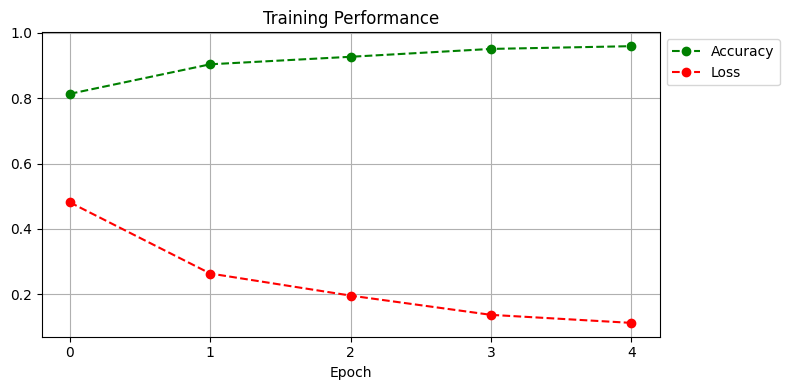

In [2]:
# Define input size for resizing images
IMG_SIZE = 128

# Randomize brightness and contrast — used during preprocessing
def enhance(img_array):
    image = Image.fromarray(np.uint8(img_array))
    brightness = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    contrast = ImageEnhance.Contrast(brightness).enhance(random.uniform(0.8, 1.2))
    return np.array(contrast) / 255.0

# Turn image paths into normalized arrays
def process_images(image_list):
    output = []
    for filepath in image_list:
        raw = load_img(filepath, target_size=(IMG_SIZE, IMG_SIZE))
        enhanced = enhance(raw)
        output.append(enhanced)
    return np.array(output)

# Label encoder based on folder order
def label_encoder(label_list):
    unique = os.listdir(train_path)
    return np.array([unique.index(lbl) for lbl in label_list])

# Custom mini data loader
def image_batch_gen(imgs, lbls, size=12, reps=1):
    for _ in range(reps):
        for i in range(0, len(imgs), size):
            x_batch = process_images(imgs[i:i+size])
            y_batch = label_encoder(lbls[i:i+size])
            yield x_batch, y_batch

# Build CNN on top of pre-trained base (VGG16)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
for layer in vgg_base.layers:
    layer.trainable = False
for layer in vgg_base.layers[-3:]:
    layer.trainable = True

model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    vgg_base,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(os.listdir(train_path)), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Model Training
BATCH = 20
EPOCHS = 5
STEPS = len(train_images) // BATCH

history = model.fit(
    image_batch_gen(train_images, train_classes, size=BATCH, reps=EPOCHS),
    steps_per_epoch=STEPS,
    epochs=EPOCHS
)

# Plot training accuracy and loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['sparse_categorical_accuracy'], 'go--', label='Accuracy')
plt.plot(history.history['loss'], 'ro--', label='Loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.title("Training Performance")
plt.xticks(range(EPOCHS))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Evaluation, ROC, Saving Model

E0000 00:00:1744511959.594183   10161 buffer_comparator.cc:157] Difference at 64: 0.0268555, expected 65.5665
E0000 00:00:1744511959.594209   10161 buffer_comparator.cc:157] Difference at 65: 0.0272704, expected 66.58
E0000 00:00:1744511959.594213   10161 buffer_comparator.cc:157] Difference at 66: 0.0439188, expected 66.6736
E0000 00:00:1744511959.594216   10161 buffer_comparator.cc:157] Difference at 67: 0.0217231, expected 70.0884
E0000 00:00:1744511959.594219   10161 buffer_comparator.cc:157] Difference at 68: 0.0338747, expected 67.9127
E0000 00:00:1744511959.594222   10161 buffer_comparator.cc:157] Difference at 69: 0.0530608, expected 69.0353
E0000 00:00:1744511959.594224   10161 buffer_comparator.cc:157] Difference at 70: 0.0108811, expected 70.3397
E0000 00:00:1744511959.594227   10161 buffer_comparator.cc:157] Difference at 71: 0.047948, expected 75.2098
E0000 00:00:1744511959.594229   10161 buffer_comparator.cc:157] Difference at 72: 0.0256885, expected 64.8238
E0000 00:00:1

37/41 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

E0000 00:00:1744511961.866005   10163 buffer_comparator.cc:157] Difference at 64: 1.45052, expected 67.4743
E0000 00:00:1744511961.866029   10163 buffer_comparator.cc:157] Difference at 65: 0.127215, expected 67.4581
E0000 00:00:1744511961.866031   10163 buffer_comparator.cc:157] Difference at 66: 1.35202, expected 63.7261
E0000 00:00:1744511961.866033   10163 buffer_comparator.cc:157] Difference at 67: 0.410685, expected 65.4918
E0000 00:00:1744511961.866034   10163 buffer_comparator.cc:157] Difference at 68: 1.56476, expected 72.6543
E0000 00:00:1744511961.866035   10163 buffer_comparator.cc:157] Difference at 69: 0.647422, expected 71.695
E0000 00:00:1744511961.866036   10163 buffer_comparator.cc:157] Difference at 70: 1.18007, expected 70.0257
E0000 00:00:1744511961.866038   10163 buffer_comparator.cc:157] Difference at 71: 0.881744, expected 71.6937
E0000 00:00:1744511961.866039   10163 buffer_comparator.cc:157] Difference at 72: 1.51325, expected 69.4093
E0000 00:00:1744511961.86

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
Evaluation Summary:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       300
           1       0.86      0.96      0.91       306
           2       0.99      0.98      0.99       405
           3       0.98      0.98      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



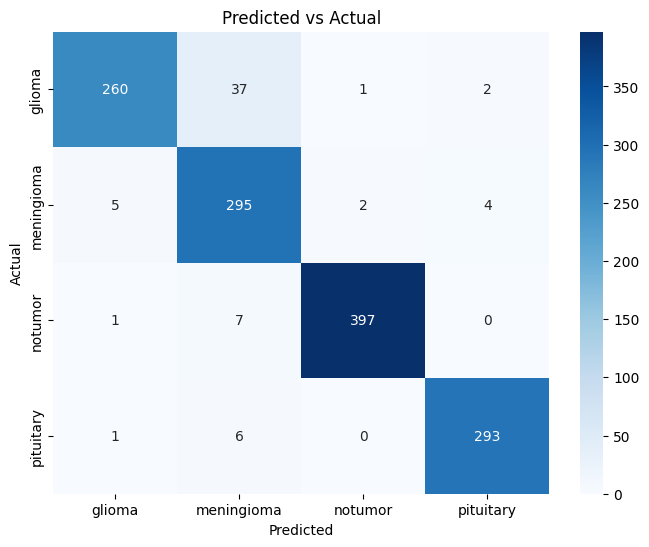

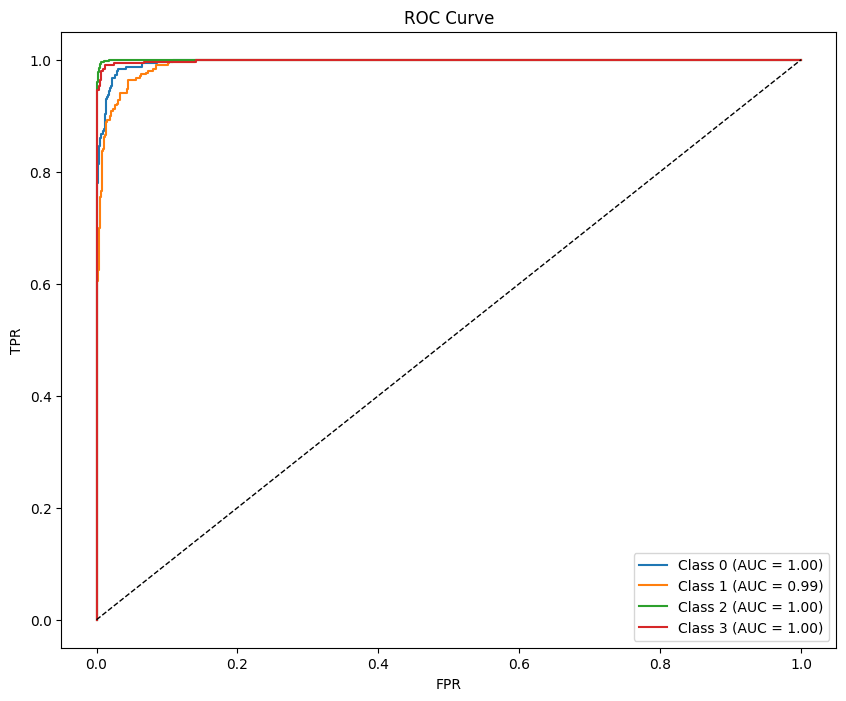

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Prepare test data
x_test = process_images(test_images)
y_test = label_encoder(test_classes)
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

# Classification report
print("Evaluation Summary:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=os.listdir(train_path),
            yticklabels=os.listdir(train_path))
plt.title("Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC & AUC computation for each class
y_test_bin = label_binarize(y_test, classes=np.arange(len(os.listdir(train_path))))
roc_data = {}

plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    score = auc(fpr, tpr)
    roc_data[i] = score
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

# Save model
model.save("model.h5")


# Inference & Display

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


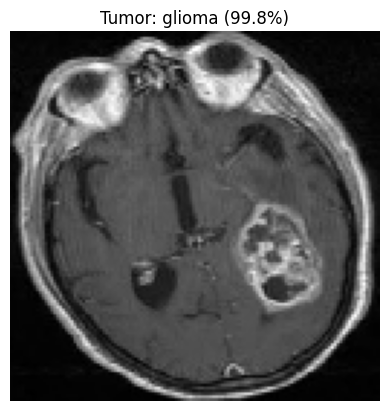

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


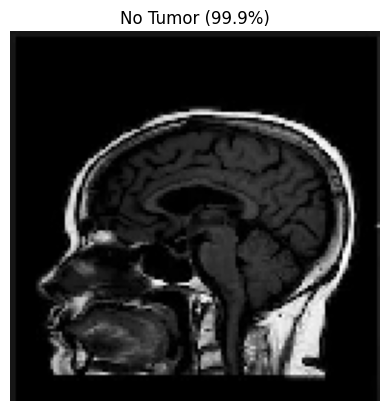

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


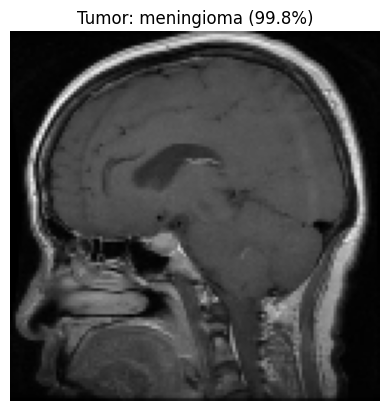

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


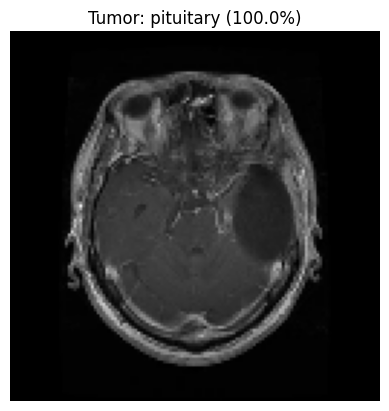

In [4]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array

# Reload saved model
model = load_model("model.h5")

# Predefined class mapping (hardcoded)
tumor_types = ['pituitary', 'glioma', 'notumor', 'meningioma']

# Tumor prediction and visualizer
def tumor_predictor(filepath, model, img_dim=128):
    try:
        image = load_img(filepath, target_size=(img_dim, img_dim))
        array = img_to_array(image) / 255.0
        array = np.expand_dims(array, axis=0)

        result = model.predict(array)
        index = np.argmax(result, axis=1)[0]
        confidence = np.max(result, axis=1)[0]

        label = tumor_types[index]
        verdict = "No Tumor" if label == 'notumor' else f"Tumor: {label}"

        plt.imshow(image)
        plt.axis("off")
        plt.title(f"{verdict} ({confidence * 100:.1f}%)")
        plt.show()
    except Exception as error:
        print("Error:", error)

# Example images (combined former cells)
test_cases = [
    'Te-meTr_0001.jpg',
    'Te-noTr_0004.jpg',
    'Te-piTr_0003.jpg',
    'Te-gl_0015.jpg'
]

for path in test_cases:
    tumor_predictor(path, model)
